<a href="https://colab.research.google.com/github/amihlyaeva/python/blob/main/%D0%B0%D0%B2%D1%82%D0%BE%D1%8D%D0%BD%D0%BA%D0%BE%D0%B4%D0%B5%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Домашнее задание. Глубокое обучение.')

Домашнее задание. Глубокое обучение.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch

Загрузить датасет MNIST (изображение рукописных цифр)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 11510536.15it/s]


Extracting ./MNIST/test/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 349274.39it/s]


Extracting ./MNIST/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 3176476.53it/s]


Extracting ./MNIST/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 7243547.06it/s]


Extracting ./MNIST/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw



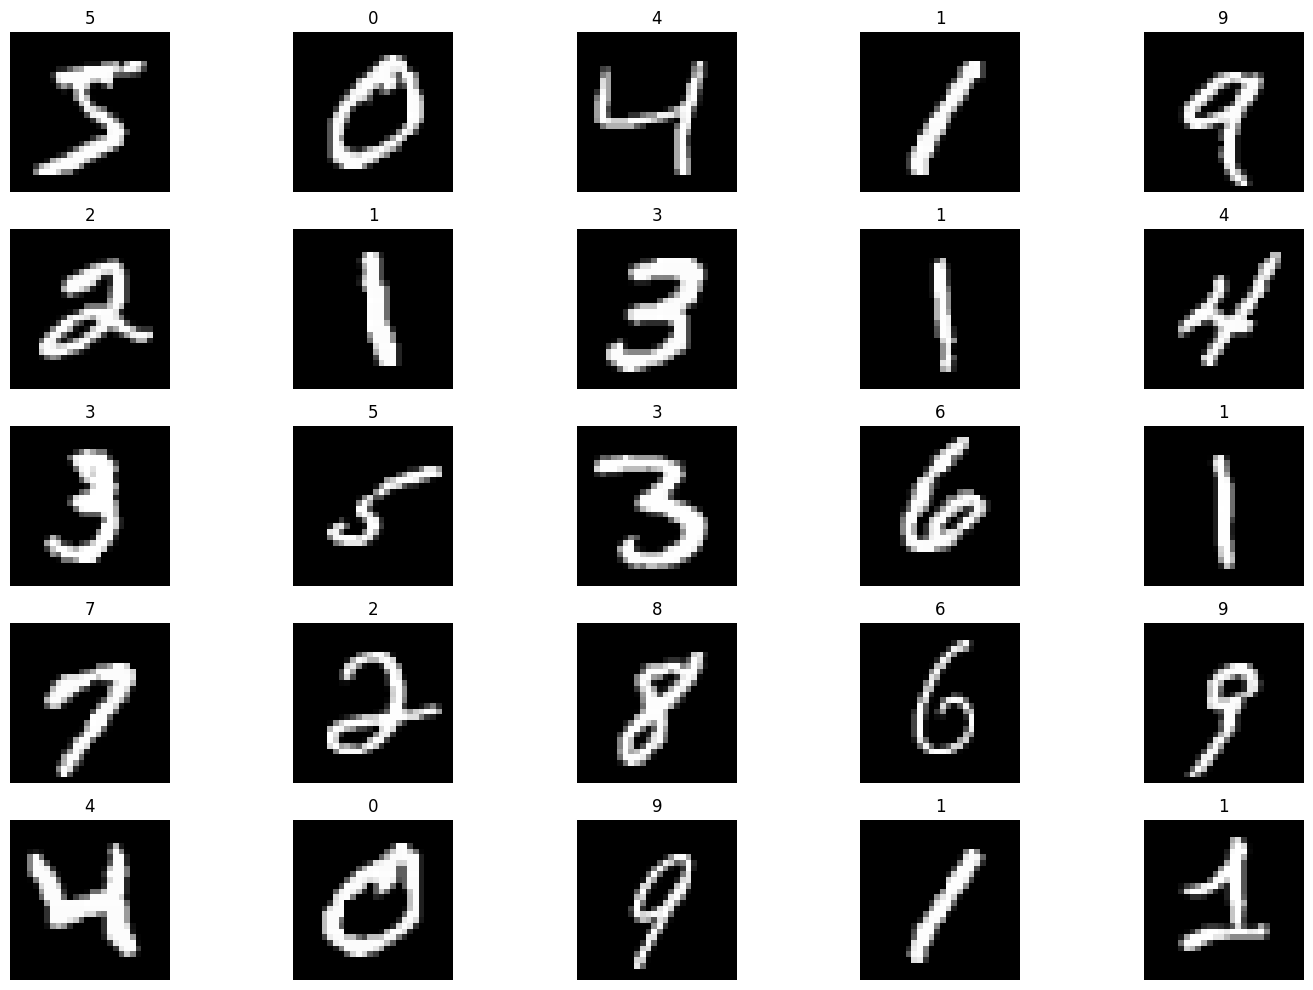

In [ ]:
plt.rcParams['figure.figsize'] = 15, 10

transform = torchvision.transforms.Compose([
	torchvision.transforms.ToTensor(),
	torchvision.transforms.Normalize((0.5), (0.5))
])

train_dataset = torchvision.datasets.MNIST(
	root="./MNIST/train", train=True,
	transform=torchvision.transforms.ToTensor(),
	download=True)

test_dataset = torchvision.datasets.MNIST(
	root="./MNIST/test", train=False,
	transform=torchvision.transforms.ToTensor(),
	download=True)

train_loader = torch.utils.data.DataLoader(
	train_dataset, batch_size=256)
test_loader = torch.utils.data.DataLoader(
	test_dataset, batch_size=256)

random_samples = np.random.randint(
	1, len(train_dataset), (25))

for idx in range(random_samples.shape[0]):
	plt.subplot(5, 5, idx + 1)
	plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
	plt.title(train_dataset[idx][1])
	plt.axis('off')

plt.tight_layout()
plt.show()


Построить с помощью библиотеки Torch модель автоэнкодера.

In [ ]:
class DeepAutoencoder(torch.nn.Module):
	def __init__(self):
		super().__init__()
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 256),
			torch.nn.ReLU(),
			torch.nn.Linear(256, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 10)
		)

		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(10, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 256),
			torch.nn.ReLU(),
			torch.nn.Linear(256, 28 * 28),
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded

model = DeepAutoencoder()
criterion = torch.nn.MSELoss()
num_epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


Обучить сеть.

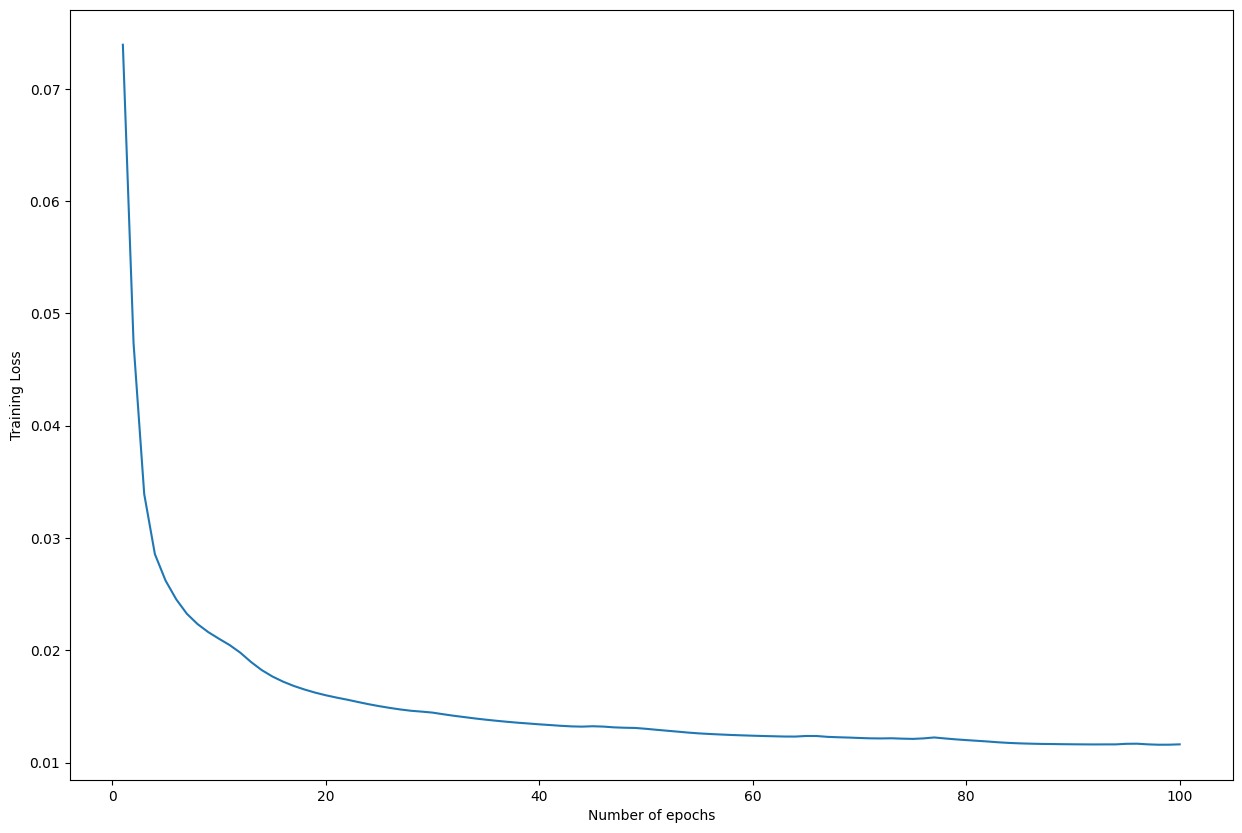

In [ ]:
train_loss = []

outputs = {}

batch_size = len(train_loader)

for epoch in range(num_epochs):
	running_loss = 0

	for batch in train_loader:
		img, _ = batch
		img = img.reshape(-1, 28*28)

		out = model(img)

		loss = criterion(out, img)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		running_loss += loss.item()

	running_loss /= batch_size
	train_loss.append(running_loss)

	outputs[epoch+1] = {'img': img, 'out': out}

plt.plot(range(1,num_epochs+1),train_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Training Loss")
plt.show()


Сравнить значения функции потерь и метрик качества на train и test.

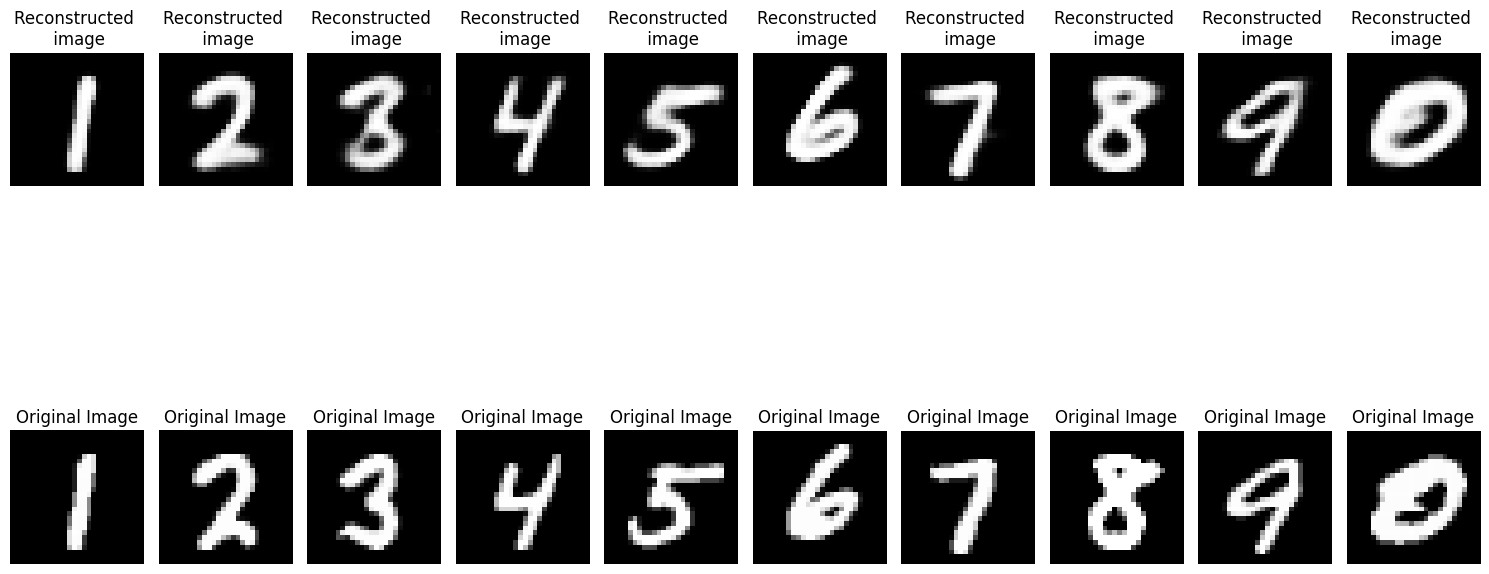

In [ ]:
outputs = {}

img, _ = list(test_loader)[-1]

img = img.reshape(-1, 28 * 28)

out = model(img)

outputs['img'] = img
outputs['out'] = out

counter = 1
val = outputs['out'].detach().numpy()

for idx in range(10):
	plt.subplot(2, 10, counter)
	plt.title("Reconstructed \n image")
	plt.imshow(val[idx].reshape(28, 28), cmap='gray')
	plt.axis('off')

	counter += 1

for idx in range(10):
	val = outputs['img']
	plt.subplot(2, 10, counter)
	plt.imshow(val[idx].reshape(28, 28), cmap='gray')
	plt.title("Original Image")
	plt.axis('off')

	counter += 1

plt.tight_layout()
plt.show()


Написать краткий вывод с идеями по улучшению модели и процесса обучения.

Краткий вывод об автоэнкодерах: это нейронные сети, которые сжимают входные данные для представления их в скрытое пространство, а затем восстанавливают из этого представления выходные данные. Цель автоэнкодера — получить на выходном слое отклик, наиболее близкий к входному.

Некоторые идеи по улучшению модели и процесса обучения автоэнкодеров:

1.Использование вариационных автоэнкодеров (VAE). Они делают внутреннее пространство более предсказуемым, непрерывным и менее разреженным. Вместо прямой передачи скрытых значений декодеру, VAE используют их для расчёта средних значений и стандартных отклонений. Затем вход декодера собирается из соответствующего нормального распределения.

2.Применение условных вариационных автоэнкодеров. Они позволяют моделировать вход на основе не только скрытой переменной, но и дополнительной информации вроде метаданных изображения (улыбка, очки, цвет кожи и т.п.).

3.Использование плавной интерполяции. Можно выбрать промежуточные значения между представлениями двух исходных изображений в латентном пространстве и получить плавную интерполяцию между изображениями.